# 

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
tf.Session(config=config)

D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import mpld3
mpld3.enable_notebook()

In [5]:
data_dir = r'D:\python_code\data\stock\^NYA'
fname = os.path.join(data_dir, 'NYA 1981 2018 technical.csv')
df = pd.read_csv(fname)
df['observation_date'] = pd.to_datetime(df["observation_date"])
df_idx = df.set_index(["observation_date"], drop=True)
df_idx.head(5)

Close   <Open>   <High>   <Low>   <Volume>   <ParCl>  \
observation_date                                                          
1981-01-02        827.50   827.50   827.50  827.50          0       0.0   
1981-01-05        836.17   836.17   836.17  836.17          0       0.0   
1981-01-06        836.81   836.81   836.81  836.81          0       0.0   
1981-01-07        817.24   817.24   817.24  817.24          0       0.0   
1981-01-08        805.72   805.72   805.72  805.72          0       0.0   

                   <FastAvg>   <SlowAvg>   <RSI>   <OverBot>  ...     INDPRO  \
observation_date                                              ...              
1981-01-02               0.0         0.0     0.0           0  ...    52.4688   
1981-01-05               0.0         0.0     0.0           0  ...    52.4688   
1981-01-06               0.0         0.0     0.0           0  ...    52.4688   
1981-01-07               0.0         0.0     0.0           0  ...    52.4688   
1981-01-08               0.0         0.0     0.0           0  ...    52.4688   

                       RPI  PERMIT  PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  \
observation_date                                                              
1981-01-02        5723.536    1221   91037  399000    40.1    95.2      0.0   
1981-01-05        5723.536    1221   91037  410000    40.1    95.2      0.0   
1981-01-06        5723.536    1221   91037  410000    40.1    95.2      0.0   
1981-01-07        5723.536    1221   91037  410000    40.1    95.2      0.0   
1981-01-08        5723.536    1221   91037  410000    40.1    95.2      0.0   

                  STLFSI  USREC  
observation_date                 
1981-01-02           0.0      0  
1981-01-05           0.0      0  
1981-01-06           0.0      0  
1981-01-07           0.0      0  
1981-01-08           0.0      0  

[5 rows x 46 columns]

In [6]:
#把順序調換
df_idx = df_idx.sort_index(axis=0, ascending=False)
df_idx = df_idx.iloc[::-1]

In [7]:
df_idx.head(5)

Close   <Open>   <High>   <Low>   <Volume>   <ParCl>  \
observation_date                                                          
1981-01-02        827.50   827.50   827.50  827.50          0       0.0   
1981-01-05        836.17   836.17   836.17  836.17          0       0.0   
1981-01-06        836.81   836.81   836.81  836.81          0       0.0   
1981-01-07        817.24   817.24   817.24  817.24          0       0.0   
1981-01-08        805.72   805.72   805.72  805.72          0       0.0   

                   <FastAvg>   <SlowAvg>   <RSI>   <OverBot>  ...     INDPRO  \
observation_date                                              ...              
1981-01-02               0.0         0.0     0.0           0  ...    52.4688   
1981-01-05               0.0         0.0     0.0           0  ...    52.4688   
1981-01-06               0.0         0.0     0.0           0  ...    52.4688   
1981-01-07               0.0         0.0     0.0           0  ...    52.4688   
1981-01-08               0.0         0.0     0.0           0  ...    52.4688   

                       RPI  PERMIT  PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  \
observation_date                                                              
1981-01-02        5723.536    1221   91037  399000    40.1    95.2      0.0   
1981-01-05        5723.536    1221   91037  410000    40.1    95.2      0.0   
1981-01-06        5723.536    1221   91037  410000    40.1    95.2      0.0   
1981-01-07        5723.536    1221   91037  410000    40.1    95.2      0.0   
1981-01-08        5723.536    1221   91037  410000    40.1    95.2      0.0   

                  STLFSI  USREC  
observation_date                 
1981-01-02           0.0      0  
1981-01-05           0.0      0  
1981-01-06           0.0      0  
1981-01-07           0.0      0  
1981-01-08           0.0      0  

[5 rows x 46 columns]

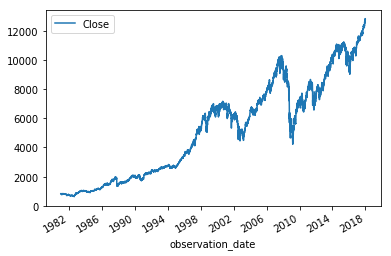

In [8]:
data = df_idx
data.plot(y='Close')

In [9]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("total data days:",days)
print("Total data: %d years"%years)
print("80 percent data = 1981 to %d"%(1981 + int(0.8*years)))
print(diff)

total data days: 13510.0
Total data: 37 years
80 percent data = 1981 to 2010
1167264000000000000 nanoseconds


In [10]:
#切割訓練與測試資料
split_date = pd.Timestamp('01-01-2011')

train = data.loc[:split_date]
test = data.loc[split_date:]
test_date = test.index
test_date = pd.to_datetime(test_date)


In [11]:
# 資料正規化

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [12]:
#without sc
#train_sc = train
#test_sc = test

In [13]:
train_sc.shape

(7570, 46)

In [14]:
train_sc_df = pd.DataFrame(train_sc,index=train.index,columns=train.columns)
test_sc_df = pd.DataFrame(test_sc,index=test.index,columns=test.columns)



In [15]:
train_sc_df

Close    <Open>    <High>     <Low>   <Volume>   <ParCl>  \
observation_date                                                                
1981-01-02        0.021235  0.021235  0.021070  0.021381   0.000000  0.000000   
1981-01-05        0.022129  0.022129  0.021958  0.022282   0.000000  0.000000   
1981-01-06        0.022195  0.022195  0.022024  0.022348   0.000000  0.000000   
1981-01-07        0.020176  0.020176  0.020020  0.020315   0.000000  0.000000   
1981-01-08        0.018987  0.018987  0.018840  0.019118   0.000000  0.000000   
1981-01-09        0.019249  0.019249  0.019100  0.019382   0.000000  0.000000   
1981-01-12        0.019336  0.019336  0.019186  0.019469   0.000000  0.077894   
1981-01-13        0.019150  0.019150  0.019002  0.019282   0.000000  0.077894   
1981-01-14        0.019369  0.019369  0.019219  0.019502   0.000000  0.077721   
1981-01-15        0.019849  0.019849  0.019695  0.019985   0.000000  0.077721   
1981-01-16        0.020220  0.020220  0.020064  0.020360   0.000000  0.077747   
1981-01-19        0.019968  0.019968  0.019814  0.020106   0.000000  0.077806   
1981-01-20        0.018343  0.018343  0.018201  0.018469   0.000000  0.078719   
1981-01-21        0.018102  0.018103  0.017962  0.018227   0.000000  0.078685   
1981-01-22        0.017415  0.017415  0.017280  0.017535   0.000000  0.078607   
1981-01-23        0.017372  0.017372  0.017237  0.017492   0.000000  0.078456   
1981-01-26        0.017077  0.017077  0.016944  0.017194   0.000000  0.078265   
1981-01-27        0.017885  0.017885  0.017746  0.018008   0.000000  0.078017   
1981-01-28        0.017437  0.017437  0.017302  0.017557   0.000000  0.077794   
1981-01-29        0.017339  0.017339  0.017205  0.017458   0.000000  0.077593   
1981-01-30        0.016881  0.016881  0.016750  0.016997   0.000000  0.077413   
1981-02-02        0.015134  0.015134  0.015017  0.015239   0.000000  0.077195   
1981-02-03        0.016019  0.016019  0.015895  0.016129   0.000000  0.076745   
1981-02-04        0.016193  0.016193  0.016068  0.016305   0.000000  0.076357   
1981-02-05        0.016924  0.016924  0.016793  0.017041   0.000000  0.076024   
1981-02-06        0.017491  0.017492  0.017356  0.017612   0.000000  0.073975   
1981-02-09        0.016640  0.016640  0.016511  0.016755   0.000000  0.074019   
1981-02-10        0.016564  0.016564  0.016436  0.016678   0.000000  0.074062   
1981-02-11        0.016007  0.016008  0.015884  0.016118   0.000000  0.074104   
1981-02-12        0.015549  0.015549  0.015429  0.015656   0.000000  0.074145   
...                    ...       ...       ...       ...        ...       ...   
2010-11-18        0.722218  0.708696  0.718258  0.713579   0.409145  0.751141   
2010-11-19        0.724400  0.722221  0.718850  0.720675   0.320820  0.750439   
2010-11-22        0.721223  0.724402  0.718793  0.717531   0.322052  0.749752   
2010-11-23        0.706824  0.721227  0.715642  0.709336   0.360771  0.749079   
2010-11-24        0.718020  0.706830  0.712482  0.711700   0.295407  0.748418   
2010-11-26        0.709896  0.718024  0.712464  0.713557   0.140868  0.747772   
2010-11-29        0.708121  0.709900  0.704403  0.703271   0.320651  0.747137   
2010-11-30        0.702713  0.708122  0.702639  0.702845   0.374006  0.745708   
2010-12-01        0.720545  0.702719  0.715562  0.707560   0.396999  0.743628   
2010-12-02        0.731745  0.720550  0.726345  0.725514   0.433895  0.711029   
2010-12-03        0.735803  0.731753  0.730542  0.734697   0.326092  0.711663   
2010-12-06        0.734680  0.735808  0.730421  0.737063   0.307900  0.713063   
2010-12-07        0.734571  0.734692  0.737713  0.739344   0.608458  0.714407   
2010-12-08        0.735673  0.734576  0.732390  0.735815   0.402191  0.716748   
2010-12-09        0.738957  0.735679  0.734444  0.740117   0.394764  0.718948   
2010-12-10        0.743205  0.738962  0.737652  0.742864   0.396929  0.721015   
2010-12-13        0.745963  0.743212  0.743988  0.74

In [16]:
test_sc_df

Close    <Open>    <High>     <Low>   <Volume>   <ParCl>  \
observation_date                                                                
2011-01-03        0.765978  0.757734  0.762863  0.762954   0.374178  0.759722   
2011-01-04        0.763730  0.765986  0.761960  0.763485   0.418674  0.763190   
2011-01-05        0.765573  0.763734  0.760090  0.763599   0.415924  0.765963   
2011-01-06        0.761533  0.765576  0.760625  0.765030   0.422835  0.767211   
2011-01-07        0.759410  0.761538  0.757786  0.758497   0.433224  0.777058   
2011-01-10        0.757941  0.759413  0.753533  0.757270   0.352337  0.776768   
2011-01-11        0.763368  0.757948  0.758773  0.763170   0.353585  0.776156   
2011-01-12        0.774132  0.763380  0.768532  0.768640   0.368964  0.761453   
2011-01-13        0.773766  0.774137  0.770802  0.777234   0.376288  0.761872   
2011-01-14        0.779410  0.773769  0.773379  0.776632   0.406904  0.762778   
2011-01-18        0.781143  0.779416  0.775486  0.783895   0.461320  0.764227   
2011-01-19        0.772268  0.781146  0.776054  0.775931   0.414073  0.766203   
2011-01-20        0.769358  0.772267  0.766287  0.768274   0.430798  0.768529   
2011-01-21        0.772354  0.769363  0.771086  0.774663   0.430798  0.770622   
2011-01-24        0.777686  0.772356  0.772245  0.776860   0.340642  0.771647   
2011-01-25        0.776005  0.777689  0.771667  0.775139   0.401125  0.773428   
2011-01-26        0.781424  0.776018  0.776472  0.781365   0.412961  0.775031   
2011-01-27        0.782809  0.781429  0.778334  0.785025   0.376144  0.776809   
2011-01-28        0.767905  0.782814  0.777079  0.772429   0.490443  0.791603   
2011-01-31        0.775802  0.767911  0.770803  0.773201   0.363746  0.791603   
2011-02-01        0.791378  0.775811  0.785856  0.781156   0.450803  0.775497   
2011-02-02        0.789570  0.791380  0.786347  0.793940   0.357732  0.775960   
2011-02-03        0.791271  0.789574  0.785829  0.788143   0.381538  0.776887   
2011-02-04        0.791214  0.791277  0.785149  0.791312   0.342691  0.777778   
2011-02-07        0.796182  0.791223  0.792077  0.796674   0.340624  0.778632   
2011-02-08        0.800641  0.796188  0.794529  0.800151   0.338814  0.780186   
2011-02-09        0.796941  0.800646  0.794446  0.798721   0.342367  0.782317   
2011-02-10        0.796233  0.796940  0.790890  0.794649   0.365269  0.784278   
2011-02-11        0.800129  0.796237  0.795120  0.797131   0.368297  0.786081   
2011-02-14        0.803252  0.800134  0.797521  0.804999   0.311362  0.788212   
...                    ...       ...       ...       ...        ...       ...   
2017-11-16        1.205541  1.200956  1.198120  1.209230   0.289162  1.191126   
2017-11-17        1.205501  1.203278  1.197382  1.211156   0.288067  1.189636   
2017-11-20        1.207346  1.205898  1.199061  1.212990   0.262175  1.188265   
2017-11-21        1.214067  1.210636  1.205843  1.218976   0.290909  1.172494   
2017-11-22        1.214576  1.216164  1.207833  1.221857   0.241174  1.172914   
2017-11-24        1.217786  1.217976  1.209363  1.225921   0.117821  1.173813   
2017-11-27        1.214572  1.217730  1.208915  1.222897   0.262465  1.175194   
2017-11-28        1.227931  1.216784  1.218779  1.224904   0.304500  1.176493   
2017-11-29        1.232171  1.228900  1.224530  1.237367   0.355988  1.178828   
2017-11-30        1.239032  1.235794  1.234145  1.243122   0.431075  1.182054   
2017-12-01        1.237666  1.239961  1.231645  1.230538   0.344120  1.186623   
2017-12-04        1.239764  1.245023  1.239347  1.248104   0.351176  1.190644   
2017-12-05        1.232774  1.239857  1.230733  1.240478   0.308918  1.195457   
2017-12-06        1.229190  1.231028  1.223076  1.236835   0.281855  1.199596   
2017-12-07        1.232962  1.227674  1.224697  1.235546   0.287389  1.203155   
2017-12-08        1.240607  1.236687  1.231014  1.243400   0.271132  1.204566   
2017-12-11        1.243203  1.241651  1.233694  1.25

In [17]:
for s in range(-10,-9):
    train_sc_df['Y_{}'.format(s)] = train_sc_df['Close'].shift(s)
    test_sc_df['Y_{}'.format(s)] = test_sc_df['Close'].shift(s)



In [18]:
train_sc_df

Close    <Open>    <High>     <Low>   <Volume>   <ParCl>  \
observation_date                                                                
1981-01-02        0.021235  0.021235  0.021070  0.021381   0.000000  0.000000   
1981-01-05        0.022129  0.022129  0.021958  0.022282   0.000000  0.000000   
1981-01-06        0.022195  0.022195  0.022024  0.022348   0.000000  0.000000   
1981-01-07        0.020176  0.020176  0.020020  0.020315   0.000000  0.000000   
1981-01-08        0.018987  0.018987  0.018840  0.019118   0.000000  0.000000   
1981-01-09        0.019249  0.019249  0.019100  0.019382   0.000000  0.000000   
1981-01-12        0.019336  0.019336  0.019186  0.019469   0.000000  0.077894   
1981-01-13        0.019150  0.019150  0.019002  0.019282   0.000000  0.077894   
1981-01-14        0.019369  0.019369  0.019219  0.019502   0.000000  0.077721   
1981-01-15        0.019849  0.019849  0.019695  0.019985   0.000000  0.077721   
1981-01-16        0.020220  0.020220  0.020064  0.020360   0.000000  0.077747   
1981-01-19        0.019968  0.019968  0.019814  0.020106   0.000000  0.077806   
1981-01-20        0.018343  0.018343  0.018201  0.018469   0.000000  0.078719   
1981-01-21        0.018102  0.018103  0.017962  0.018227   0.000000  0.078685   
1981-01-22        0.017415  0.017415  0.017280  0.017535   0.000000  0.078607   
1981-01-23        0.017372  0.017372  0.017237  0.017492   0.000000  0.078456   
1981-01-26        0.017077  0.017077  0.016944  0.017194   0.000000  0.078265   
1981-01-27        0.017885  0.017885  0.017746  0.018008   0.000000  0.078017   
1981-01-28        0.017437  0.017437  0.017302  0.017557   0.000000  0.077794   
1981-01-29        0.017339  0.017339  0.017205  0.017458   0.000000  0.077593   
1981-01-30        0.016881  0.016881  0.016750  0.016997   0.000000  0.077413   
1981-02-02        0.015134  0.015134  0.015017  0.015239   0.000000  0.077195   
1981-02-03        0.016019  0.016019  0.015895  0.016129   0.000000  0.076745   
1981-02-04        0.016193  0.016193  0.016068  0.016305   0.000000  0.076357   
1981-02-05        0.016924  0.016924  0.016793  0.017041   0.000000  0.076024   
1981-02-06        0.017491  0.017492  0.017356  0.017612   0.000000  0.073975   
1981-02-09        0.016640  0.016640  0.016511  0.016755   0.000000  0.074019   
1981-02-10        0.016564  0.016564  0.016436  0.016678   0.000000  0.074062   
1981-02-11        0.016007  0.016008  0.015884  0.016118   0.000000  0.074104   
1981-02-12        0.015549  0.015549  0.015429  0.015656   0.000000  0.074145   
...                    ...       ...       ...       ...        ...       ...   
2010-11-18        0.722218  0.708696  0.718258  0.713579   0.409145  0.751141   
2010-11-19        0.724400  0.722221  0.718850  0.720675   0.320820  0.750439   
2010-11-22        0.721223  0.724402  0.718793  0.717531   0.322052  0.749752   
2010-11-23        0.706824  0.721227  0.715642  0.709336   0.360771  0.749079   
2010-11-24        0.718020  0.706830  0.712482  0.711700   0.295407  0.748418   
2010-11-26        0.709896  0.718024  0.712464  0.713557   0.140868  0.747772   
2010-11-29        0.708121  0.709900  0.704403  0.703271   0.320651  0.747137   
2010-11-30        0.702713  0.708122  0.702639  0.702845   0.374006  0.745708   
2010-12-01        0.720545  0.702719  0.715562  0.707560   0.396999  0.743628   
2010-12-02        0.731745  0.720550  0.726345  0.725514   0.433895  0.711029   
2010-12-03        0.735803  0.731753  0.730542  0.734697   0.326092  0.711663   
2010-12-06        0.734680  0.735808  0.730421  0.737063   0.307900  0.713063   
2010-12-07        0.734571  0.734692  0.737713  0.739344   0.608458  0.714407   
2010-12-08        0.735673  0.734576  0.732390  0.735815   0.402191  0.716748   
2010-12-09        0.738957  0.735679  0.734444  0.740117   0.394764  0.718948   
2010-12-10        0.743205  0.738962  0.737652  0.742864   0.396929  0.721015   
2010-12-13        0.745963  0.743212  0.743988  0.74

In [19]:
test_sc_df

Close    <Open>    <High>     <Low>   <Volume>   <ParCl>  \
observation_date                                                                
2011-01-03        0.765978  0.757734  0.762863  0.762954   0.374178  0.759722   
2011-01-04        0.763730  0.765986  0.761960  0.763485   0.418674  0.763190   
2011-01-05        0.765573  0.763734  0.760090  0.763599   0.415924  0.765963   
2011-01-06        0.761533  0.765576  0.760625  0.765030   0.422835  0.767211   
2011-01-07        0.759410  0.761538  0.757786  0.758497   0.433224  0.777058   
2011-01-10        0.757941  0.759413  0.753533  0.757270   0.352337  0.776768   
2011-01-11        0.763368  0.757948  0.758773  0.763170   0.353585  0.776156   
2011-01-12        0.774132  0.763380  0.768532  0.768640   0.368964  0.761453   
2011-01-13        0.773766  0.774137  0.770802  0.777234   0.376288  0.761872   
2011-01-14        0.779410  0.773769  0.773379  0.776632   0.406904  0.762778   
2011-01-18        0.781143  0.779416  0.775486  0.783895   0.461320  0.764227   
2011-01-19        0.772268  0.781146  0.776054  0.775931   0.414073  0.766203   
2011-01-20        0.769358  0.772267  0.766287  0.768274   0.430798  0.768529   
2011-01-21        0.772354  0.769363  0.771086  0.774663   0.430798  0.770622   
2011-01-24        0.777686  0.772356  0.772245  0.776860   0.340642  0.771647   
2011-01-25        0.776005  0.777689  0.771667  0.775139   0.401125  0.773428   
2011-01-26        0.781424  0.776018  0.776472  0.781365   0.412961  0.775031   
2011-01-27        0.782809  0.781429  0.778334  0.785025   0.376144  0.776809   
2011-01-28        0.767905  0.782814  0.777079  0.772429   0.490443  0.791603   
2011-01-31        0.775802  0.767911  0.770803  0.773201   0.363746  0.791603   
2011-02-01        0.791378  0.775811  0.785856  0.781156   0.450803  0.775497   
2011-02-02        0.789570  0.791380  0.786347  0.793940   0.357732  0.775960   
2011-02-03        0.791271  0.789574  0.785829  0.788143   0.381538  0.776887   
2011-02-04        0.791214  0.791277  0.785149  0.791312   0.342691  0.777778   
2011-02-07        0.796182  0.791223  0.792077  0.796674   0.340624  0.778632   
2011-02-08        0.800641  0.796188  0.794529  0.800151   0.338814  0.780186   
2011-02-09        0.796941  0.800646  0.794446  0.798721   0.342367  0.782317   
2011-02-10        0.796233  0.796940  0.790890  0.794649   0.365269  0.784278   
2011-02-11        0.800129  0.796237  0.795120  0.797131   0.368297  0.786081   
2011-02-14        0.803252  0.800134  0.797521  0.804999   0.311362  0.788212   
...                    ...       ...       ...       ...        ...       ...   
2017-11-16        1.205541  1.200956  1.198120  1.209230   0.289162  1.191126   
2017-11-17        1.205501  1.203278  1.197382  1.211156   0.288067  1.189636   
2017-11-20        1.207346  1.205898  1.199061  1.212990   0.262175  1.188265   
2017-11-21        1.214067  1.210636  1.205843  1.218976   0.290909  1.172494   
2017-11-22        1.214576  1.216164  1.207833  1.221857   0.241174  1.172914   
2017-11-24        1.217786  1.217976  1.209363  1.225921   0.117821  1.173813   
2017-11-27        1.214572  1.217730  1.208915  1.222897   0.262465  1.175194   
2017-11-28        1.227931  1.216784  1.218779  1.224904   0.304500  1.176493   
2017-11-29        1.232171  1.228900  1.224530  1.237367   0.355988  1.178828   
2017-11-30        1.239032  1.235794  1.234145  1.243122   0.431075  1.182054   
2017-12-01        1.237666  1.239961  1.231645  1.230538   0.344120  1.186623   
2017-12-04        1.239764  1.245023  1.239347  1.248104   0.351176  1.190644   
2017-12-05        1.232774  1.239857  1.230733  1.240478   0.308918  1.195457   
2017-12-06        1.229190  1.231028  1.223076  1.236835   0.281855  1.199596   
2017-12-07        1.232962  1.227674  1.224697  1.235546   0.287389  1.203155   
2017-12-08        1.240607  1.236687  1.231014  1.243400   0.271132  1.204566   
2017-12-11        1.243203  1.241651  1.233694  1.25

In [20]:
#X_train = train_sc_df.dropna().drop('Y', axis=1)
X_train = train_sc_df.dropna().drop('Y_-10', axis=1)
y_train = train_sc_df.dropna()['Y_-10']
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
"""X_train = X_train[:-1]
y_train = y_train[:-1]"""

D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


'X_train = X_train[:-1]\ny_train = y_train[:-1]'

In [21]:
X_train

array([[0.02123455, 0.02123468, 0.02107024, ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.0221293 , 0.02212943, 0.02195807, ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.02219534, 0.02219548, 0.02202361, ..., 0.44481605, 0.1198527 ,
        0.        ],
       ...,
       [0.74649918, 0.74596819, 0.74432667, ..., 0.68896321, 0.02812186,
        0.        ],
       [0.74067454, 0.7465038 , 0.74176662, ..., 0.68896321, 0.02812186,
        0.        ],
       [0.74495323, 0.74062443, 0.73940113, ..., 0.68896321, 0.02812186,
        0.        ]])

In [22]:
X_train.shape

(7560, 46)

In [23]:
y_train.shape

(7560,)

In [24]:
X_test = test_sc_df.dropna().drop('Y_-10', axis=1)
y_test = test_sc_df.dropna().dropna()['Y_-10']

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()
"""
X_test = X_test[:-1]
y_test = y_test[:-1]
"""

D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
D:\Users\Bojun_Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


'\nX_test = X_test[:-1]\ny_test = y_test[:-1]\n'

In [25]:
y_train

array([0.02022009, 0.01996828, 0.01834287, ..., 0.75746527, 0.75647764,
       0.7577274 ])

In [26]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7560 x 46)
Test size: (1751 x 46)


In [27]:
from keras.models import Sequential
from keras.layers import Dense,Add,Reshape,Lambda
from keras.optimizers import Adam, RMSprop
import keras.backend as K
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.layers import CuDNNLSTM, LSTM
from keras import Input,layers
from keras.models import Model
from keras.layers import PReLU

from tcn import compiled_tcn,TCN

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


val_split_ratio = 0.1

Using TensorFlow backend.


## 使用1層網路，啟動函數為relu

In [ ]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', 
                kernel_initializer='he_uniform'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001, clipnorm=1), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history= model.fit(X_train, y_train, batch_size=32,validation_split= val_split_ratio,
          epochs=50, verbose=1,callbacks=[early_stop])

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[10:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

print('R-Squared: %f'%(r2_score(y_test_rsquare, y_pred)))


In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-10:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//usstock_de10_1l_50n.csv', mode='w', header=True, index=False)

In [28]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=5, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.1, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6804 samples, validate on 756 samples
Epoch 1/400
6804/6804 [==============================] - 19s 3ms/step - loss: 6.1063 - val_loss: 0.0327
Epoch 2/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0516 - val_loss: 0.1162
Epoch 3/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0298 - val_loss: 0.0562
Epoch 4/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0217 - val_loss: 0.1004
Epoch 5/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0142 - val_loss: 0.0538
Epoch 6/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0116 - val_loss: 0.0705
Epoch 7/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0094 - val_loss: 0.0835
Epoch 8/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0063 - val_loss: 0.0556
Epoch 9/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0089 - val_loss: 0.0692
Epoch 10/400
6804

6804/6804 [==============================] - 14s 2ms/step - loss: 5.9993e-04 - val_loss: 0.0696
Epoch 79/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.4203e-04 - val_loss: 0.0644
Epoch 80/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3639e-04 - val_loss: 0.0646
Epoch 81/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0033 - val_loss: 0.0524
Epoch 82/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6604e-04 - val_loss: 0.0680
Epoch 83/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6961e-04 - val_loss: 0.0629
Epoch 84/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.7971e-04 - val_loss: 0.0673
Epoch 85/400
6804/6804 [==============================] - 14s 2ms/step - loss: 8.3356e-04 - val_loss: 0.0583
Epoch 86/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.4885e-04 - val_loss: 0.0509
Epoch 87/400
6804/6804 [============

6804/6804 [==============================] - 14s 2ms/step - loss: 4.1499e-04 - val_loss: 0.0263
Epoch 153/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.3910e-04 - val_loss: 0.0319
Epoch 154/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2807e-04 - val_loss: 0.0205
Epoch 155/400
6804/6804 [==============================] - 14s 2ms/step - loss: 2.8741e-04 - val_loss: 0.0431
Epoch 156/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0578e-04 - val_loss: 0.0234
Epoch 157/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.2293e-04 - val_loss: 0.0369
Epoch 158/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.3470e-04 - val_loss: 0.0216
Epoch 159/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.5768e-04 - val_loss: 0.0338
Epoch 160/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.5639e-04 - val_loss: 0.0272
Epoch 161/400
6804/6804 

6804/6804 [==============================] - 14s 2ms/step - loss: 6.6540e-04 - val_loss: 0.0437
Epoch 227/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.5974e-04 - val_loss: 0.0389
Epoch 228/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.1208e-04 - val_loss: 0.0419
Epoch 229/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2856e-04 - val_loss: 0.0393
Epoch 230/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2728e-04 - val_loss: 0.0467
Epoch 231/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.8929e-04 - val_loss: 0.0631
Epoch 232/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3239e-04 - val_loss: 0.0336
Epoch 233/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.0231e-04 - val_loss: 0.0388
Epoch 234/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0113e-04 - val_loss: 0.0408
Epoch 235/400
6804/6804 

6804/6804 [==============================] - 14s 2ms/step - loss: 4.7508e-04 - val_loss: 0.0316
Epoch 301/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.0406e-04 - val_loss: 0.0351
Epoch 302/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.8163e-04 - val_loss: 0.0383
Epoch 303/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.2389e-04 - val_loss: 0.0315
Epoch 304/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.5460e-04 - val_loss: 0.0410
Epoch 305/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.6683e-04 - val_loss: 0.0355
Epoch 306/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.7367e-04 - val_loss: 0.0428
Epoch 307/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.9421e-04 - val_loss: 0.0299s: 4.9101e
Epoch 308/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.2840e-04 - val_loss: 0.0424
Epoch 309/400


6804/6804 [==============================] - 14s 2ms/step - loss: 4.1405e-04 - val_loss: 0.0184
Epoch 375/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0706e-04 - val_loss: 0.0215
Epoch 376/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.9622e-04 - val_loss: 0.0198
Epoch 377/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.8288e-04 - val_loss: 0.0129
Epoch 378/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.6486e-04 - val_loss: 0.0165
Epoch 379/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0584e-04 - val_loss: 0.0270
Epoch 380/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.4396e-04 - val_loss: 0.0212
Epoch 381/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.3505e-04 - val_loss: 0.0190
Epoch 382/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0941e-04 - val_loss: 0.0210
Epoch 383/400
6804/6804 

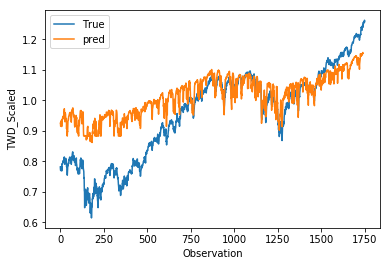

y_pred.shape: (1751, 1)
y_test_rsquare.shape: (1751,)
R-Squared: 0.465358
The Adjusted R2 score on the Test set is:	0.451


In [30]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[10:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

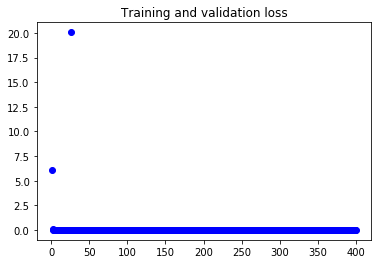

In [32]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [33]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-10:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//usstock_de10_1l_50n.csv', mode='w', header=True, index=False)

In [ ]:
#tcn2

In [28]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=5, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.1, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6804 samples, validate on 756 samples
Epoch 1/400
6804/6804 [==============================] - 19s 3ms/step - loss: 6.1063 - val_loss: 0.0327
Epoch 2/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0516 - val_loss: 0.1162
Epoch 3/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0298 - val_loss: 0.0562
Epoch 4/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0217 - val_loss: 0.1004
Epoch 5/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0142 - val_loss: 0.0538
Epoch 6/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0116 - val_loss: 0.0705
Epoch 7/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0094 - val_loss: 0.0835
Epoch 8/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0063 - val_loss: 0.0556
Epoch 9/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0089 - val_loss: 0.0692
Epoch 10/400
6804

6804/6804 [==============================] - 14s 2ms/step - loss: 4.1499e-04 - val_loss: 0.0263
Epoch 153/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.3910e-04 - val_loss: 0.0319
Epoch 154/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2807e-04 - val_loss: 0.0205
Epoch 155/400
6804/6804 [==============================] - 14s 2ms/step - loss: 2.8741e-04 - val_loss: 0.0431
Epoch 156/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0578e-04 - val_loss: 0.0234
Epoch 157/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.2293e-04 - val_loss: 0.0369
Epoch 158/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.3470e-04 - val_loss: 0.0216
Epoch 159/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.5768e-04 - val_loss: 0.0338
Epoch 160/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.5639e-04 - val_loss: 0.0272
Epoch 161/400
6804/6804 

6804/6804 [==============================] - 14s 2ms/step - loss: 4.7508e-04 - val_loss: 0.0316
Epoch 301/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.0406e-04 - val_loss: 0.0351
Epoch 302/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.8163e-04 - val_loss: 0.0383
Epoch 303/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.2389e-04 - val_loss: 0.0315
Epoch 304/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.5460e-04 - val_loss: 0.0410
Epoch 305/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.6683e-04 - val_loss: 0.0355
Epoch 306/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.7367e-04 - val_loss: 0.0428
Epoch 307/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.9421e-04 - val_loss: 0.0299s: 4.9101e
Epoch 308/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.2840e-04 - val_loss: 0.0424
Epoch 309/400


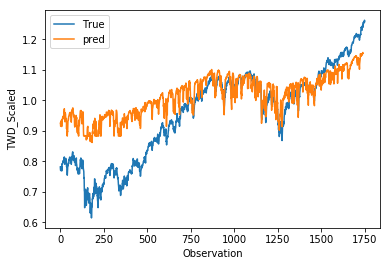

y_pred.shape: (1751, 1)
y_test_rsquare.shape: (1751,)
R-Squared: 0.465358
The Adjusted R2 score on the Test set is:	0.451


In [30]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[10:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

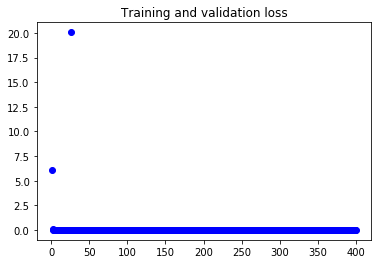

In [32]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [33]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-10:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//usstock_de10_tcn2.csv', mode='w', header=True, index=False)

In [ ]:
#tcn3

In [28]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=5, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.1, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6804 samples, validate on 756 samples
Epoch 1/400
6804/6804 [==============================] - 19s 3ms/step - loss: 6.1063 - val_loss: 0.0327
Epoch 2/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0516 - val_loss: 0.1162
Epoch 3/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0298 - val_loss: 0.0562
Epoch 4/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0217 - val_loss: 0.1004
Epoch 5/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0142 - val_loss: 0.0538
Epoch 6/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0116 - val_loss: 0.0705
Epoch 7/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0094 - val_loss: 0.0835
Epoch 8/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0063 - val_loss: 0.0556
Epoch 9/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0089 - val_loss: 0.0692
Epoch 10/400
6804

6804/6804 [==============================] - 14s 2ms/step - loss: 5.9993e-04 - val_loss: 0.0696
Epoch 79/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.4203e-04 - val_loss: 0.0644
Epoch 80/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3639e-04 - val_loss: 0.0646
Epoch 81/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0033 - val_loss: 0.0524
Epoch 82/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6604e-04 - val_loss: 0.0680
Epoch 83/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6961e-04 - val_loss: 0.0629
Epoch 84/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.7971e-04 - val_loss: 0.0673
Epoch 85/400
6804/6804 [==============================] - 14s 2ms/step - loss: 8.3356e-04 - val_loss: 0.0583
Epoch 86/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.4885e-04 - val_loss: 0.0509
Epoch 87/400
6804/6804 [============

6804/6804 [==============================] - 14s 2ms/step - loss: 6.6540e-04 - val_loss: 0.0437
Epoch 227/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.5974e-04 - val_loss: 0.0389
Epoch 228/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.1208e-04 - val_loss: 0.0419
Epoch 229/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2856e-04 - val_loss: 0.0393
Epoch 230/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2728e-04 - val_loss: 0.0467
Epoch 231/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.8929e-04 - val_loss: 0.0631
Epoch 232/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3239e-04 - val_loss: 0.0336
Epoch 233/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.0231e-04 - val_loss: 0.0388
Epoch 234/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0113e-04 - val_loss: 0.0408
Epoch 235/400
6804/6804 

6804/6804 [==============================] - 14s 2ms/step - loss: 4.1405e-04 - val_loss: 0.0184
Epoch 375/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0706e-04 - val_loss: 0.0215
Epoch 376/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.9622e-04 - val_loss: 0.0198
Epoch 377/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.8288e-04 - val_loss: 0.0129
Epoch 378/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.6486e-04 - val_loss: 0.0165
Epoch 379/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0584e-04 - val_loss: 0.0270
Epoch 380/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.4396e-04 - val_loss: 0.0212
Epoch 381/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.3505e-04 - val_loss: 0.0190
Epoch 382/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0941e-04 - val_loss: 0.0210
Epoch 383/400
6804/6804 

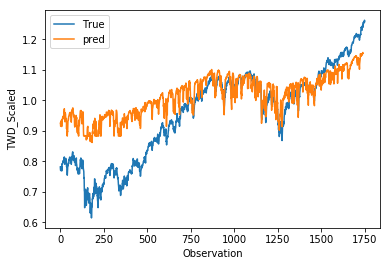

y_pred.shape: (1751, 1)
y_test_rsquare.shape: (1751,)
R-Squared: 0.465358
The Adjusted R2 score on the Test set is:	0.451


In [30]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[10:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

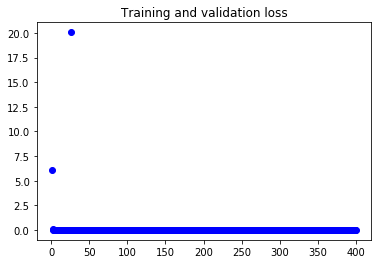

In [32]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [33]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-10:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//usstock_de10_tcn3.csv', mode='w', header=True, index=False)

In [ ]:
#tcn4

In [28]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=5, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.1, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6804 samples, validate on 756 samples
Epoch 1/400
6804/6804 [==============================] - 19s 3ms/step - loss: 6.1063 - val_loss: 0.0327
Epoch 2/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0516 - val_loss: 0.1162
Epoch 3/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0298 - val_loss: 0.0562
Epoch 4/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0217 - val_loss: 0.1004
Epoch 5/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0142 - val_loss: 0.0538
Epoch 6/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0116 - val_loss: 0.0705
Epoch 7/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0094 - val_loss: 0.0835
Epoch 8/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0063 - val_loss: 0.0556
Epoch 9/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0089 - val_loss: 0.0692
Epoch 10/400
6804

6804/6804 [==============================] - 14s 2ms/step - loss: 5.9993e-04 - val_loss: 0.0696
Epoch 79/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.4203e-04 - val_loss: 0.0644
Epoch 80/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3639e-04 - val_loss: 0.0646
Epoch 81/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0033 - val_loss: 0.0524
Epoch 82/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6604e-04 - val_loss: 0.0680
Epoch 83/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6961e-04 - val_loss: 0.0629
Epoch 84/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.7971e-04 - val_loss: 0.0673
Epoch 85/400
6804/6804 [==============================] - 14s 2ms/step - loss: 8.3356e-04 - val_loss: 0.0583
Epoch 86/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.4885e-04 - val_loss: 0.0509
Epoch 87/400
6804/6804 [============

6804/6804 [==============================] - 14s 2ms/step - loss: 6.6540e-04 - val_loss: 0.0437
Epoch 227/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.5974e-04 - val_loss: 0.0389
Epoch 228/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.1208e-04 - val_loss: 0.0419
Epoch 229/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2856e-04 - val_loss: 0.0393
Epoch 230/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2728e-04 - val_loss: 0.0467
Epoch 231/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.8929e-04 - val_loss: 0.0631
Epoch 232/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3239e-04 - val_loss: 0.0336
Epoch 233/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.0231e-04 - val_loss: 0.0388
Epoch 234/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0113e-04 - val_loss: 0.0408
Epoch 235/400
6804/6804 

6804/6804 [==============================] - 14s 2ms/step - loss: 4.1405e-04 - val_loss: 0.0184
Epoch 375/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0706e-04 - val_loss: 0.0215
Epoch 376/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.9622e-04 - val_loss: 0.0198
Epoch 377/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.8288e-04 - val_loss: 0.0129
Epoch 378/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.6486e-04 - val_loss: 0.0165
Epoch 379/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0584e-04 - val_loss: 0.0270
Epoch 380/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.4396e-04 - val_loss: 0.0212
Epoch 381/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.3505e-04 - val_loss: 0.0190
Epoch 382/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0941e-04 - val_loss: 0.0210
Epoch 383/400
6804/6804 

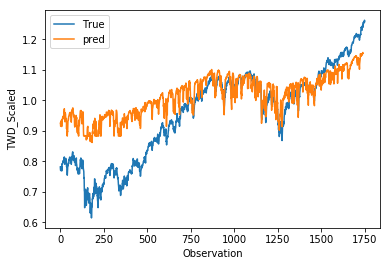

y_pred.shape: (1751, 1)
y_test_rsquare.shape: (1751,)
R-Squared: 0.465358
The Adjusted R2 score on the Test set is:	0.451


In [30]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[10:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

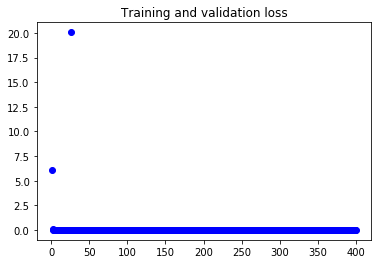

In [32]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [33]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-10:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//usstock_de10_tcn4.csv', mode='w', header=True, index=False)

In [ ]:
#tcn5

In [28]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=5, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.1, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6804 samples, validate on 756 samples
Epoch 1/400
6804/6804 [==============================] - 19s 3ms/step - loss: 6.1063 - val_loss: 0.0327
Epoch 2/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0516 - val_loss: 0.1162
Epoch 3/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0298 - val_loss: 0.0562
Epoch 4/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0217 - val_loss: 0.1004
Epoch 5/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0142 - val_loss: 0.0538
Epoch 6/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0116 - val_loss: 0.0705
Epoch 7/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0094 - val_loss: 0.0835
Epoch 8/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0063 - val_loss: 0.0556
Epoch 9/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0089 - val_loss: 0.0692
Epoch 10/400
6804

6804/6804 [==============================] - 14s 2ms/step - loss: 5.9993e-04 - val_loss: 0.0696
Epoch 79/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.4203e-04 - val_loss: 0.0644
Epoch 80/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3639e-04 - val_loss: 0.0646
Epoch 81/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0033 - val_loss: 0.0524
Epoch 82/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6604e-04 - val_loss: 0.0680
Epoch 83/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6961e-04 - val_loss: 0.0629
Epoch 84/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.7971e-04 - val_loss: 0.0673
Epoch 85/400
6804/6804 [==============================] - 14s 2ms/step - loss: 8.3356e-04 - val_loss: 0.0583
Epoch 86/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.4885e-04 - val_loss: 0.0509
Epoch 87/400
6804/6804 [============

6804/6804 [==============================] - 14s 2ms/step - loss: 6.6540e-04 - val_loss: 0.0437
Epoch 227/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.5974e-04 - val_loss: 0.0389
Epoch 228/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.1208e-04 - val_loss: 0.0419
Epoch 229/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2856e-04 - val_loss: 0.0393
Epoch 230/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2728e-04 - val_loss: 0.0467
Epoch 231/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.8929e-04 - val_loss: 0.0631
Epoch 232/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3239e-04 - val_loss: 0.0336
Epoch 233/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.0231e-04 - val_loss: 0.0388
Epoch 234/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0113e-04 - val_loss: 0.0408
Epoch 235/400
6804/6804 

6804/6804 [==============================] - 14s 2ms/step - loss: 4.1405e-04 - val_loss: 0.0184
Epoch 375/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0706e-04 - val_loss: 0.0215
Epoch 376/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.9622e-04 - val_loss: 0.0198
Epoch 377/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.8288e-04 - val_loss: 0.0129
Epoch 378/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.6486e-04 - val_loss: 0.0165
Epoch 379/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0584e-04 - val_loss: 0.0270
Epoch 380/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.4396e-04 - val_loss: 0.0212
Epoch 381/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.3505e-04 - val_loss: 0.0190
Epoch 382/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0941e-04 - val_loss: 0.0210
Epoch 383/400
6804/6804 

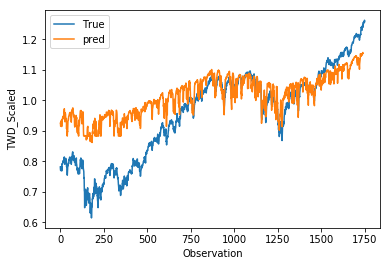

y_pred.shape: (1751, 1)
y_test_rsquare.shape: (1751,)
R-Squared: 0.465358
The Adjusted R2 score on the Test set is:	0.451


In [30]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[10:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

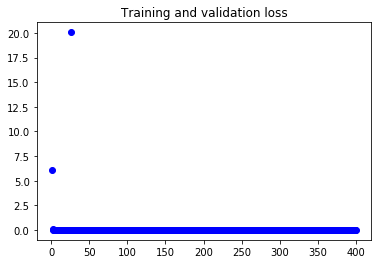

In [32]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [33]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-10:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//usstock_de10_tcn5.csv', mode='w', header=True, index=False)

In [ ]:
#tcn6

In [28]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


input_tensor = Input(shape=(1,X_train.shape[1],))
output = TCN(nb_filters=256, kernel_size=2, nb_stacks=5, dilations=[1, 2, 4, 8, 16, 32], \
        activation='relu', padding='causal', use_skip_connections=True,\
        dropout_rate=0.1, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

output_tensor = Dense(1)(output)
model = Model(input_tensor, output_tensor)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
"""
history_model = model.fit(X_tr_t, y_train, epochs=50, 
                                    batch_size=32, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False,
                                    callbacks=[early_stop])
""" 
history_model = model.fit(X_tr_t, y_train, epochs=400, 
                                    batch_size=16, verbose=1,
                                    validation_split= val_split_ratio,
                                    shuffle=False)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 46)        0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 256)       12032       input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 256)       131328      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 256)       0           tcn_d_causal_conv_1_tanh_s0[0][0]
__________________________________________________________________________________________________
tcn_spatia

Train on 6804 samples, validate on 756 samples
Epoch 1/400
6804/6804 [==============================] - 19s 3ms/step - loss: 6.1063 - val_loss: 0.0327
Epoch 2/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0516 - val_loss: 0.1162
Epoch 3/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0298 - val_loss: 0.0562
Epoch 4/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0217 - val_loss: 0.1004
Epoch 5/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0142 - val_loss: 0.0538
Epoch 6/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0116 - val_loss: 0.0705
Epoch 7/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0094 - val_loss: 0.0835
Epoch 8/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0063 - val_loss: 0.0556
Epoch 9/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0089 - val_loss: 0.0692
Epoch 10/400
6804

6804/6804 [==============================] - 14s 2ms/step - loss: 5.9993e-04 - val_loss: 0.0696
Epoch 79/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.4203e-04 - val_loss: 0.0644
Epoch 80/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3639e-04 - val_loss: 0.0646
Epoch 81/400
6804/6804 [==============================] - 14s 2ms/step - loss: 0.0033 - val_loss: 0.0524
Epoch 82/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6604e-04 - val_loss: 0.0680
Epoch 83/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.6961e-04 - val_loss: 0.0629
Epoch 84/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.7971e-04 - val_loss: 0.0673
Epoch 85/400
6804/6804 [==============================] - 14s 2ms/step - loss: 8.3356e-04 - val_loss: 0.0583
Epoch 86/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.4885e-04 - val_loss: 0.0509
Epoch 87/400
6804/6804 [============

6804/6804 [==============================] - 14s 2ms/step - loss: 6.6540e-04 - val_loss: 0.0437
Epoch 227/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.5974e-04 - val_loss: 0.0389
Epoch 228/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.1208e-04 - val_loss: 0.0419
Epoch 229/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2856e-04 - val_loss: 0.0393
Epoch 230/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.2728e-04 - val_loss: 0.0467
Epoch 231/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.8929e-04 - val_loss: 0.0631
Epoch 232/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.3239e-04 - val_loss: 0.0336
Epoch 233/400
6804/6804 [==============================] - 14s 2ms/step - loss: 5.0231e-04 - val_loss: 0.0388
Epoch 234/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0113e-04 - val_loss: 0.0408
Epoch 235/400
6804/6804 

6804/6804 [==============================] - 14s 2ms/step - loss: 4.1405e-04 - val_loss: 0.0184
Epoch 375/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0706e-04 - val_loss: 0.0215
Epoch 376/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.9622e-04 - val_loss: 0.0198
Epoch 377/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.8288e-04 - val_loss: 0.0129
Epoch 378/400
6804/6804 [==============================] - 14s 2ms/step - loss: 3.6486e-04 - val_loss: 0.0165
Epoch 379/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0584e-04 - val_loss: 0.0270
Epoch 380/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.4396e-04 - val_loss: 0.0212
Epoch 381/400
6804/6804 [==============================] - 14s 2ms/step - loss: 6.3505e-04 - val_loss: 0.0190
Epoch 382/400
6804/6804 [==============================] - 14s 2ms/step - loss: 4.0941e-04 - val_loss: 0.0210
Epoch 383/400
6804/6804 

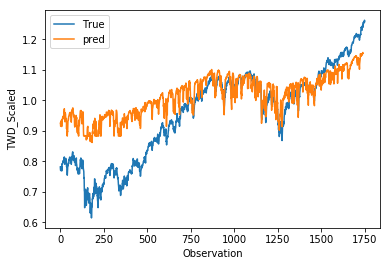

y_pred.shape: (1751, 1)
y_test_rsquare.shape: (1751,)
R-Squared: 0.465358
The Adjusted R2 score on the Test set is:	0.451


In [30]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_tst_t)
#y_pred是三天前就知道，所以往前移三格
y_test_pic = y_test[:]
y_pred_pic = y_pred[10:]
y_test_rsquare = y_test[:]
plt.plot(y_test_pic, label='True')
plt.plot(y_pred_pic, label='pred')
plt.xlabel('Observation')
plt.ylabel('TWD_Scaled')
plt.legend()
plt.show()
print("y_pred.shape:",y_pred.shape)
print("y_test_rsquare.shape:",y_test_rsquare.shape)

r2_test = r2_score(y_test_rsquare, y_pred)
print('R-Squared: %f'%(r2_test))
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))




dict_keys(['val_loss', 'loss'])


Text(0.5,1,'Training and validation loss')

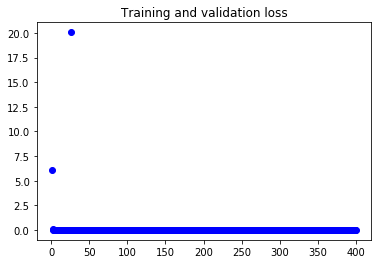

In [32]:
import matplotlib.pyplot as plt
print(history_model.history.keys())

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [33]:
# 把價格縮放解除
## create empty table with 12 fields
y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
## put the predicted values in the right field
y_pred_data_like[:,0] = y_pred[:,0]
## inverse transform and then select the right field
y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

#檢查測試資料的維度
yd_size = X_test.shape[0]

# 把價格轉換維度
yd = y_pred_data.reshape(yd_size,)

# 刪除頭一天(從這天開始，所以沒價格)
test_date_trim = test_date

# 放在MC要推移一天，所以要刪除最後一天
test_date_trim = np.delete(test_date_trim, np.s_[-10:])

# 製作CSV
AnalysisResult = pd.DataFrame()
Date = pd.Series(test_date_trim)
Price = pd.Series(yd)
Date.name = 'Date'
Price.name = 'Price'

# 因為放在MC要開高低收，所以複製收盤填入
Open = Price.copy()
High = Price.copy()
Low = Price.copy()
Open.name = 'Open'
High.name = 'High'
Low.name = 'Low'

AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Price], axis=1)

AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

# 輸出CSV檔案
import os
Target_DirPath = 'Deep-Learning-in-Python-master/'

if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
AnalysisResult.to_csv(Target_DirPath + '//usstock_de10_tcn6.csv', mode='w', header=True, index=False)